# Iris

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

## Data

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


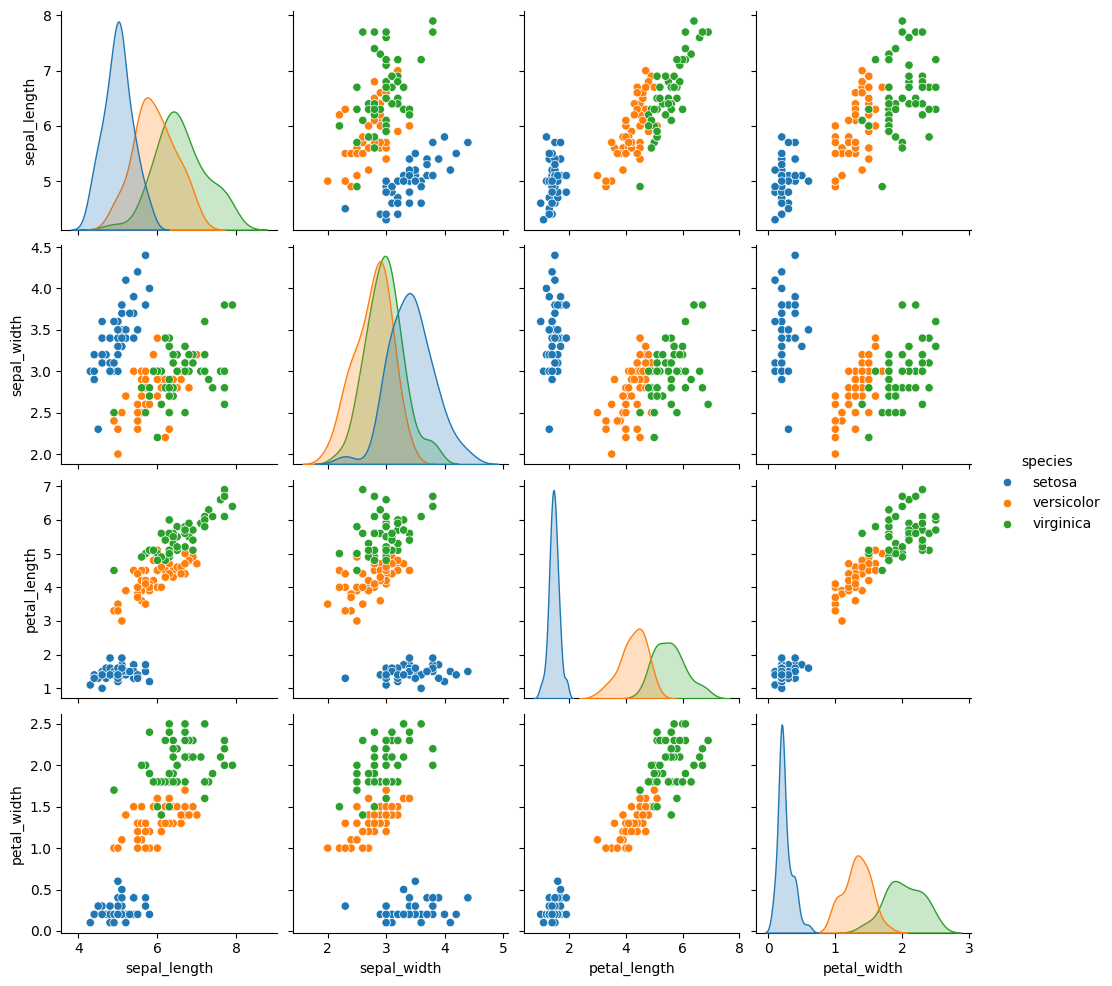

In [3]:
sns.pairplot(iris, hue='species')

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
data = torch.tensor(iris.iloc[:,:4].values).float()

labels = torch.zeros(len(data), dtype=torch.long)

labels[iris.species=='setosa'] = 0
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

## Create the ANN model

In [ ]:
# model arch
ANNiris = nn.Sequential(
    nn.Linear(4,64), # input layer - 4 sample features as an input
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,3) # output - 3 flower types
)

for i in ANNiris.parameters():
  print(i.shape)
  print(i)
  print('\n')

torch.Size([64, 4])
Parameter containing:
tensor([[-0.4341,  0.2743,  0.4219, -0.3047],
        [ 0.0106,  0.1298,  0.0615, -0.1143],
        [-0.2638,  0.2904,  0.2485, -0.1737],
        [ 0.0464,  0.3596,  0.1720,  0.3742],
        [-0.1779,  0.3775, -0.2978,  0.1196],
        [-0.4970, -0.0702, -0.0831, -0.3570],
        [ 0.4141,  0.2911,  0.1032,  0.4683],
        [ 0.2339,  0.2863, -0.3668,  0.3249],
        [ 0.2412, -0.2989, -0.0579, -0.3927],
        [-0.1173,  0.3105,  0.2381,  0.0775],
        [ 0.1221,  0.4039, -0.0088,  0.3637],
        [-0.4872, -0.2855,  0.1967, -0.4992],
        [-0.3344,  0.4562,  0.0476, -0.4857],
        [-0.1820,  0.0609,  0.2570, -0.4168],
        [ 0.1326, -0.2968,  0.2618, -0.3541],
        [-0.1297, -0.2791, -0.2182,  0.3627],
        [ 0.0420, -0.3145,  0.0593,  0.4053],
        [-0.2568,  0.4117,  0.4908, -0.4250],
        [-0.0520, -0.2302,  0.1314,  0.1632],
        [-0.2922,  0.1233,  0.4817,  0.1416],
        [ 0.4575, -0.3864, -0.2366,  0

In [ ]:
# loss function
lossfun = nn.CrossEntropyLoss()
lossfun

CrossEntropyLoss()

In [ ]:
# optimizer
optimizer = torch.optim.SGD(ANNiris.parameters(), lr=0.01)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

## Train the model

In [ ]:

numepochs = 1000

losses = torch.zeros(numepochs)
ongoingAcc = []

for epochi in range(numepochs):
  yHat = ANNiris(data)

  loss = lossfun(yHat, labels)
  losses[epochi] = loss

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # acc
  matches = torch.argmax(yHat, axis=1) == labels # booleans (false/true)
  matchesNumeric = matches.float()
  accuracyPct = 100*torch.mean(matchesNumeric)
  ongoingAcc.append(accuracyPct)

predictions = ANNiris(data)
predlabels = torch.argmax(predictions,axis=1)
totalacc = 100*torch.mean((predlabels==labels).float())

print(f'Final accuracy: {totalacc}%')

Final accuracy: 98.0%


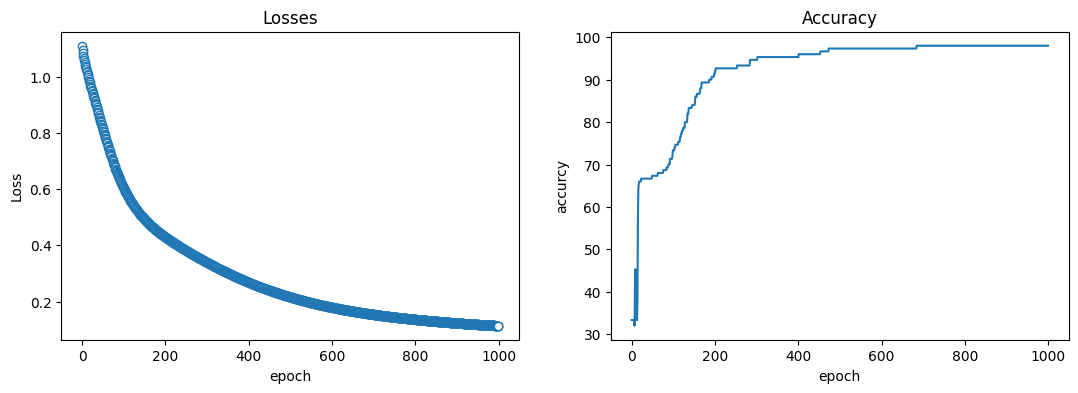

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(13,4))

ax[0].plot(losses.detach(), '-o', markerfacecolor='w')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('accurcy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')

plt.show()

## Softmax test

Confirm that all model predictions sum to 1, but only when converted to softmax

In [ ]:
sm = nn.Softmax(1)
torch.sum(yHat, axis=1)

tensor([-0.8813, -0.7742, -0.8103, -0.7821, -0.8929, -0.9778, -0.8421, -0.8580,
        -0.7321, -0.7902, -0.9311, -0.8505, -0.7641, -0.7466, -0.9778, -1.0802,
        -0.9748, -0.8878, -0.9696, -0.9384, -0.8701, -0.9254, -0.8632, -0.8285,
        -0.8216, -0.7660, -0.8633, -0.8886, -0.8680, -0.8046, -0.7842, -0.8793,
        -0.9752, -1.0170, -0.7958, -0.8182, -0.8919, -0.8773, -0.7551, -0.8644,
        -0.8828, -0.6012, -0.7906, -0.8778, -0.9290, -0.7724, -0.9283, -0.8003,
        -0.9261, -0.8432, -0.5947, -0.5949, -0.5575, -0.4066, -0.5002, -0.4930,
        -0.6050, -0.4579, -0.5239, -0.4966, -0.3613, -0.5587, -0.3881, -0.5109,
        -0.5656, -0.5842, -0.5371, -0.4936, -0.3733, -0.4567, -0.5710, -0.5272,
        -0.4127, -0.4878, -0.5378, -0.5582, -0.4934, -0.5266, -0.5208, -0.5064,
        -0.4382, -0.4435, -0.5053, -0.4421, -0.5339, -0.6340, -0.5656, -0.3979,
        -0.5586, -0.4501, -0.4500, -0.5391, -0.4771, -0.4356, -0.4857, -0.5535,
        -0.5325, -0.5346, -0.5046, -0.51

In [ ]:
torch.sum(sm(yHat), axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

With Softmax

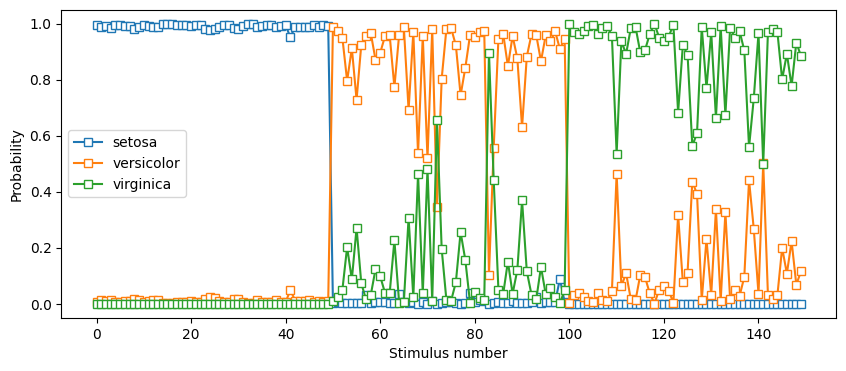

In [ ]:
# plot the raw model outputs
fig = plt.figure(figsize=(10,4))

plt.plot(sm(yHat.detach()), 's-', markerfacecolor='w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['setosa', 'versicolor', 'virginica'])
plt.show()

Without Softmax

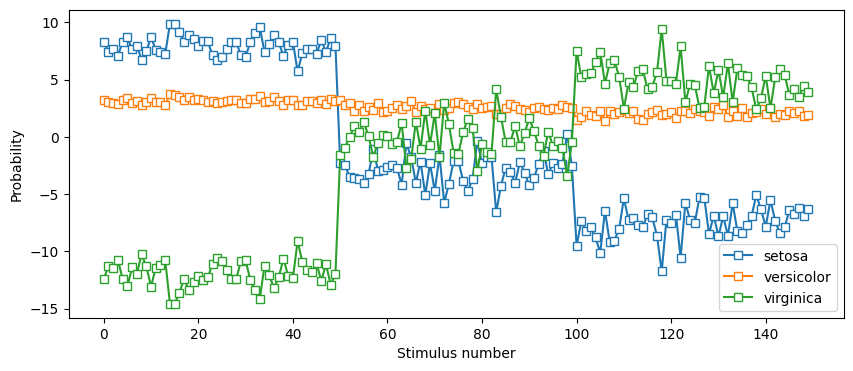

In [ ]:
# plot the raw model outputs
fig = plt.figure(figsize=(10,4))

plt.plot(yHat.detach(), 's-', markerfacecolor='w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['setosa', 'versicolor', 'virginica'])
plt.show()

## Hidden Layer Units Experiment

The goal is to classify flowers using a model with one hidden layer, but parameterically change the number of hidden units from 1 to 128. We're going to plot classification accuracy as function of the model size.

### Single Run

Final accuracy: 74.66666412353516%


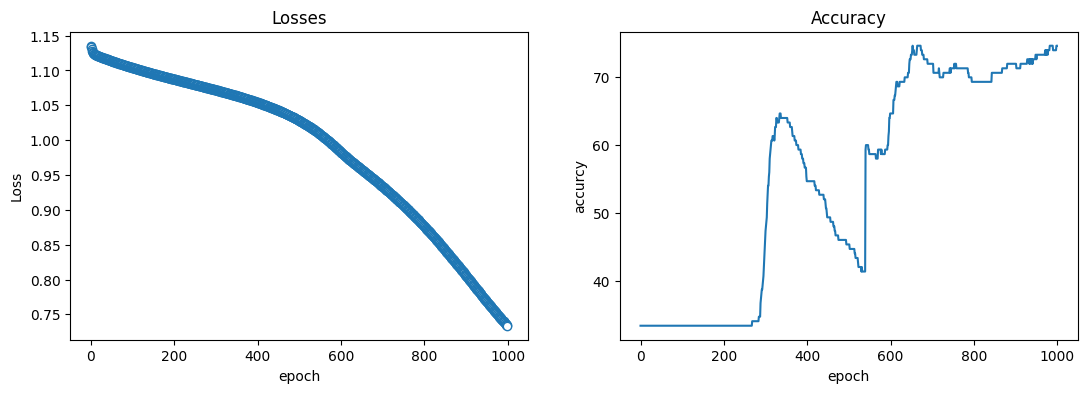

In [16]:
def train(hidden_units):
  # model arch
  ANNiris = nn.Sequential(
      nn.Linear(4,hidden_units), # input layer - 4 sample features as an input
      nn.ReLU(),
      nn.Linear(hidden_units,hidden_units),
      nn.ReLU(),
      nn.Linear(hidden_units,3) # output - 3 flower types
  )

  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(ANNiris.parameters(), lr=0.01)

  numepochs = 1000

  losses = torch.zeros(numepochs)
  ongoingAcc = []

  for epochi in range(numepochs):
    yHat = ANNiris(data)

    loss = lossfun(yHat, labels)
    losses[epochi] = loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # acc
    matches = torch.argmax(yHat, axis=1) == labels # booleans (false/true)
    matchesNumeric = matches.float()
    accuracyPct = 100*torch.mean(matchesNumeric)
    ongoingAcc.append(accuracyPct)

  predictions = ANNiris(data)
  predlabels = torch.argmax(predictions,axis=1)
  totalacc = 100*torch.mean((predlabels==labels).float())

  print(f'Final accuracy: {totalacc}%')

  return losses, ongoingAcc, totalacc

def plot(losses, ongoingAcc):
  fig, ax = plt.subplots(1, 2, figsize=(13,4))

  ax[0].plot(losses.detach(), '-o', markerfacecolor='w')
  ax[0].set_ylabel('Loss')
  ax[0].set_xlabel('epoch')
  ax[0].set_title('Losses')

  ax[1].plot(ongoingAcc)
  ax[1].set_ylabel('accurcy')
  ax[1].set_xlabel('epoch')
  ax[1].set_title('Accuracy')

  plt.show()

losses, ongoingAcc, totalacc = train(hidden_units=3)
plot(losses, ongoingAcc)

### 20 runs per hidden layer units count

In [33]:
num_exps = 20
hid_units = 129

hid_unit_accs = torch.zeros(num_exps)
hid_unit_accs_mean = torch.zeros(hid_units)

for hid in range(hid_units):
  for exp in range(num_exps):
    _, _, totalAcc = train(hidden_units=hid)
    hid_unit_accs[exp] = totalAcc
    print(f'Hidden Unit: {hid} - {exp}/{num_exps} iteration\n')
  hid_unit_accs_mean[hid] = torch.mean(hid_unit_accs)
  print(f'Completed Hidden Unit {hid}/{hid_units}\n---------------------------\n\n\n\n')

Streaming output truncated to the last 5000 lines.
Hidden Unit: 53 - 5/20 iteration

Final accuracy: 98.0%
Hidden Unit: 53 - 6/20 iteration

Final accuracy: 98.0%
Hidden Unit: 53 - 7/20 iteration

Final accuracy: 97.33333587646484%
Hidden Unit: 53 - 8/20 iteration

Final accuracy: 98.66667175292969%
Hidden Unit: 53 - 9/20 iteration

Final accuracy: 97.33333587646484%
Hidden Unit: 53 - 10/20 iteration

Final accuracy: 98.0%
Hidden Unit: 53 - 11/20 iteration

Final accuracy: 98.0%
Hidden Unit: 53 - 12/20 iteration

Final accuracy: 97.33333587646484%
Hidden Unit: 53 - 13/20 iteration

Final accuracy: 98.66667175292969%
Hidden Unit: 53 - 14/20 iteration

Final accuracy: 98.0%
Hidden Unit: 53 - 15/20 iteration

Final accuracy: 98.66667175292969%
Hidden Unit: 53 - 16/20 iteration

Final accuracy: 98.0%
Hidden Unit: 53 - 17/20 iteration

Final accuracy: 98.0%
Hidden Unit: 53 - 18/20 iteration

Final accuracy: 98.0%
Hidden Unit: 53 - 19/20 iteration

Completed Hidden Unit 53/129
--------------

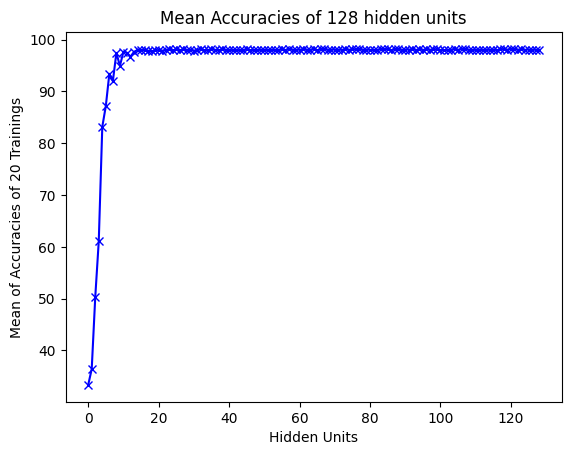

In [39]:
plt.plot(hid_unit_accs_mean, 'b-x')
plt.ylabel('Mean of Accuracies of 20 Trainings')
plt.xlabel('Hidden Units')
plt.title('Mean Accuracies of 128 hidden units')
plt.show()

# Generated Data

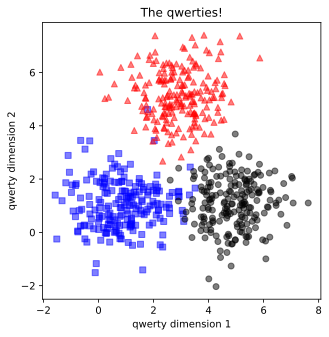

In [ ]:
# import libraries
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# create data

nPerClust = 200
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]
C = [  3, 5 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1)),np.ones((nPerClust,1))*2))

# concatanate into a matrix
data_np = np.hstack((a,b,c)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).long().squeeze()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs', alpha=0.5)
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko', alpha=0.5)
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^', alpha=0.5)
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [ ]:
def train():
  # model architecture
  ANN = nn.Sequential(nn.Linear(2,4),   # input layer
                      nn.ReLU(),         # activation
                      nn.Linear(4,3),   # output
                      nn.Softmax(dim=1)
                      )

  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(ANN.parameters(),lr=.01)

  numepochs = 10000

  # initialize losses
  losses = torch.zeros(numepochs)
  ongoingAcc = []

  # loop over epochs
  for epochi in range(numepochs):

    # forward pass
    yHat = ANN(data)

    # compute loss
    loss = lossfun(yHat,labels)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # compute accuracy
    matches = torch.argmax(yHat,axis=1) == labels # booleans (false/true)
    matchesNumeric = matches.float()              # convert to numbers (0/1)
    accuracyPct = 100*torch.mean(matchesNumeric)  # average and x100
    ongoingAcc.append( accuracyPct )              # add to list of accuracies



  # final forward pass
  predictions = ANN(data)

  predlabels = torch.argmax(predictions,axis=1)
  totalacc = 100*torch.mean((predlabels == labels).float())

  return losses, totalacc

losses, totalacc = train()

Final accuracy: 98.1667%


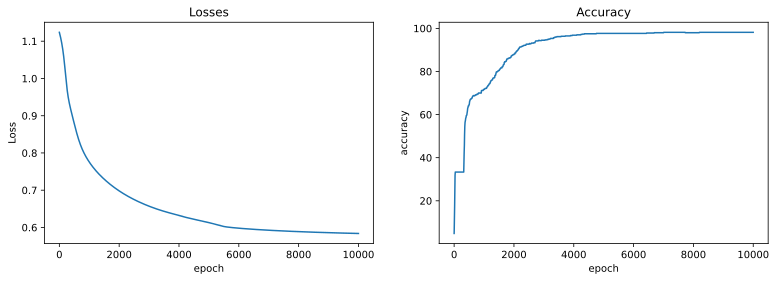

In [ ]:
# report accuracy
print('Final accuracy: %g%%' %totalacc)

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()
# run training again to see whether this performance is consistent

In [ ]:
# confirm that all model predictions sum to 1, but only when converted to softmax
sm = nn.Softmax(1)
torch.sum(yHat,axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

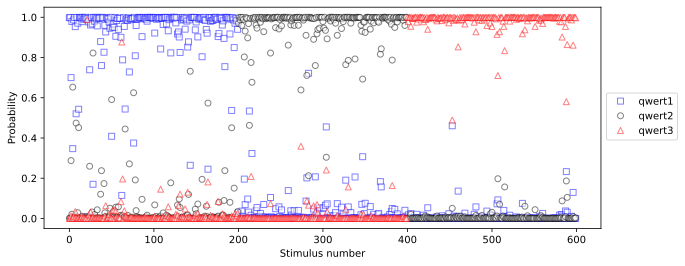

In [ ]:
# plot the raw model outputs

fig = plt.figure(figsize=(10,4))

colorshape = ['bs', 'ko', 'r^']

for i in range(3):
  plt.plot(yHat[:,i].detach(), colorshape[i], markerfacecolor='w', alpha=0.5)

plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['qwert1','qwert2','qwert3'], loc=(1.01,.4))
plt.show()

## Experiment

We're going to run our train model 50 times and see if model returns always good accuracy.

In [ ]:
numExp = 50
accuracies = np.zeros(numExp)

for exp in range(numExp):
  losses, totalacc = train()
  accuracies[exp] = totalacc

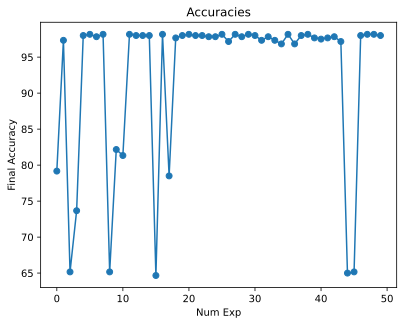

In [ ]:
plt.plot(accuracies, '-o')
plt.xlabel('Num Exp')
plt.ylabel('Final Accuracy')
plt.title('Accuracies')
plt.show()

Model in general is very good. Sometimes its accuracy get lower it may be due to unlucky weights distribution, too small number of epochs, etc. Eventually the model is performs well.